<a href="https://colab.research.google.com/github/Edward484/OptimizationClassUB/blob/master/pract2_1ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradient descent principles
#### Nils Lennier Mattiß, Federica Valeau and Selea Eduard Mihai
### 1. Gradient descent methods
During this first part, we will perform the gradient descent method to three different functions, and then we will compare our result to find out in which occasion the gradient descent performs better.

#### 1.1 A simple quadratic function

Let's start by numerically optimize a simple two-dimensional function $ f(x) = x^2_1+x^2_2, \ x \in \R^{"}, \ x= (x_1, x_2)^T. $ Since it's a convex function (we can notice it by the positive sign of the coefficient of $x^2$) it will have a single minimum, found where $ \nabla f(x) = 0$. Let's now find where the gradient is equal to zero.

$ \nabla f(x)= \Big( \frac{\partial f}{\partial x_{1}}, \frac{\partial f}{\partial x_{2}}\Big)^T =(2x_{1},2x_{2})^T \\ 
\nabla f(x)=0 \\
\frac{\partial f}{\partial x_{1}} = 2x_1 = 0, \ x_1 = 0 \\
\frac{\partial f}{\partial x_{2} }= 2x_2 = 0, \ x_2 = 0
$ 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

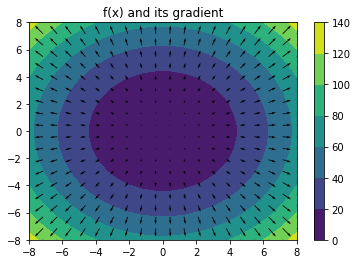

In [ ]:
# Countour plot of f(x) with gradient
x = np.linspace(-8.0, 8.0, 20)
y = np.linspace(-8.0, 8.0, 20)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
ax.set_title('f(x) and its gradient')
u = 2*X
v = 2*Y

plt.quiver(x,y,u,v)
plt.show()

Here we have plotted the contour of f(x). This plot indicates that the function is small where the color is dark and, as the color gets brighter, the function increases. We can see that the function f(x) is convex even from this plot.

By going in the opposite direction from the one indicated by the arrows representing the gradient of the function, we can easily arrive to the minimum.

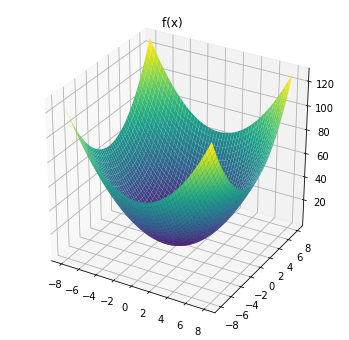

In [ ]:
from turtle import color


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

def f(x1,x2):
  return x1**2 + x2**2

x1=np.linspace(-8,8,50)
x2=np.linspace(-8,8,50)
X, Y = np.meshgrid(x1,x2)
Z=f(X,Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('f(x) ')
plt.show()

This is the plot of our function f(x). We can clearly see that it is convex and its minimum is at the point (0,0).

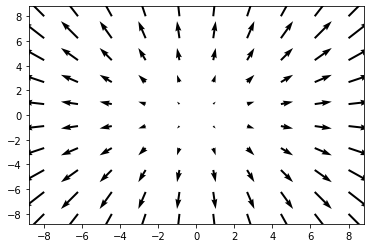

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x,y = np.meshgrid(np.linspace(-8,8,10),np.linspace(-8,8,10))

u = 2*x
v = 2*y

plt.quiver(x,y,u,v)
plt.show()

In this Plot we are seeing how the arrows get bigger as the slope of the gradient increases. If we want to perform a gradient descent, we will go in the shortest opposite direction of these arrows to get to the minimum.

In [ ]:
def grad(x,y):
    return np.array([2*x,2*y])

def gradient_descent(start, gradient, learn_rate, max_iter):
    steps_x = [] # history tracking
    steps_y = [] # history tracking
    x = start

    for _ in range(max_iter):
        diff = learn_rate* gradient(x[0], x[1])
        x = x - diff
        steps_x.append(x[0]) # history tracing
        steps_y.append(x[1]) # history tracing

    return steps_x, steps_y, x

steps_x, steps_y, x= gradient_descent((10,10), grad, 0.1, 100 )
steps_z = []

for pair in zip(steps_x, steps_y):
    steps_z.append(f(pair[0], pair[1]))

X1 = np.array(steps_x)
Y1 = np.array(steps_y)
Z1 = np.array(steps_z)


print( "The last point to which it converged is : ", X1[-1],Y1[-1], Z1[-1])

The last point to which it converged is :  2.0370359763344878e-09 2.0370359763344878e-09 8.299031137761999e-18


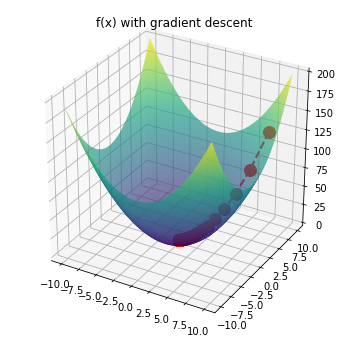

In [ ]:
from turtle import color


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

def f(x1,x2):
  return x1**2 + x2**2

x1=np.linspace(-10,10,500)
x2=np.linspace(-10,10,500)
X, Y = np.meshgrid(x1,x2)
Z=f(X,Y)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('f(x) with gradient descent')

ax.plot(X1,Y1,Z1, color='red', marker='o', linestyle='dashed',
     linewidth=2, markersize=12)
plt.show()

This is the 3d graph that shows how the gradient descent algorithm performs.

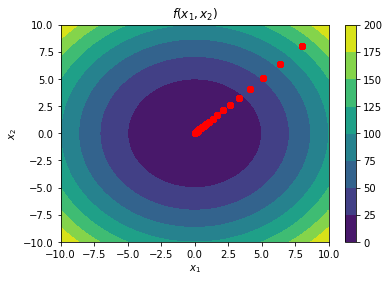

In [ ]:
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = x1**2 + x2**2
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp)
ax.set_title('$f(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

lines_x = [X1 for x in range(len(X1))]
lines_y = [Y1 for x in range(len(Y1))]
plt.plot(lines_x, lines_y, 'black', linestyle="-")
for i in range(len(Y1)):
    if i == 0:
        plt.scatter(X1, Y1, color='orange')
        plt.plot()
    else:
        plt.scatter(X1, Y1, color='r')
plt.show()

The contour graph on top is the path taken by the gradient descent algorithm when it starts from (10,10). Here we can clearly see how the line that descents is always perpendicular to the gradient line.

Now we will start from a much further away. Let's say (75, 60) and see how our algorithm performs.

In [ ]:
steps_x, steps_y, x= gradient_descent((75,60), grad, 0.1, 100 )
steps_z = []

for pair in zip(steps_x, steps_y):
    steps_z.append(f(pair[0], pair[1]))

X2 = np.array(steps_x)
Y2 = np.array(steps_y)
Z2 = np.array(steps_z)

print( "The last point to which it converged is : ", X2[-1],Y2[-1], Z2[-1])

The last point to which it converged is :  1.527776982250866e-08 1.2222215858006927e-08 3.8279281122927223e-16


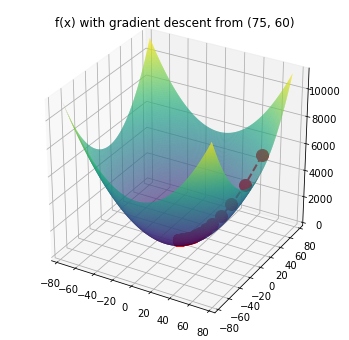

In [ ]:
from turtle import color


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

def f(x1,x2):
  return x1**2 + x2**2

x1=np.linspace(-75,75,400)
x2=np.linspace(-75,75,400)
X, Y = np.meshgrid(x1,x2)
Z=f(X,Y)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('f(x) with gradient descent from (75, 60)')

ax.plot(X2,Y2,Z2, color='red', marker='o', linestyle='dashed',
     linewidth=2, markersize=12)
plt.show()

This is again, the 3d plot of our function with the points through which gradient descent algorithm passes to get to the minimum.

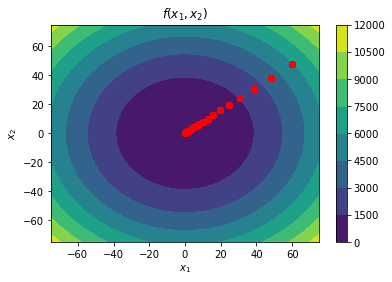

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib import collections  as mc

# Countour plot of f(x)
x1 = np.linspace(-75, 75, 100)
x2 = np.linspace(-75, 75, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = x1**2 + x2**2
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp)
ax.set_title('$f(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

lines_x = [X2 for x in range(len(X2))]
lines_y = [Y2 for x in range(len(Y2))]
plt.plot(lines_x, lines_y, 'black', linestyle="-")
for i in range(len(Y1)):
    if i == 0:
        plt.scatter(X2, Y2, color='orange')
        plt.plot()
    else:
        plt.scatter(X2, Y2, color='r')
plt.show()

This is the contour plot and the points through which the descent algorithm passed.

Now we will use just 20 iterations for the same point (75,60). See what is the difference.

The last point to which it converged is :  0.8646911284551354 0.6917529027641083 1.2262128261115852


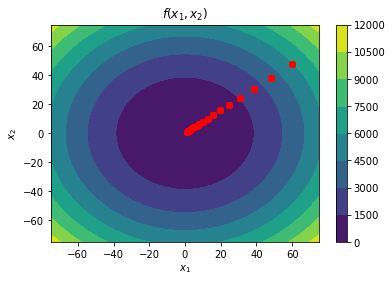

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

steps_x, steps_y, x= gradient_descent((75,60), grad, 0.1, 20 )
steps_z = []

for pair in zip(steps_x, steps_y):
    steps_z.append(f(pair[0], pair[1]))

X3 = np.array(steps_x)
Y3 = np.array(steps_y)
Z3 = np.array(steps_z)

print( "The last point to which it converged is : ", X3[-1],Y3[-1], Z3[-1])



# Countour plot of f(x)
x1 = np.linspace(-75, 75, 100)
x2 = np.linspace(-75, 75, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = x1**2 + x2**2
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp)
ax.set_title('$f(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

lines_x = [X3 for x in range(len(X2))]
lines_y = [Y3 for x in range(len(Y2))]
plt.plot(lines_x, lines_y, 'black', linestyle="-")
for i in range(len(Y1)):
    if i == 0:
        plt.scatter(X3, Y3, color='orange')
        plt.plot()
    else:
        plt.scatter(X3, Y3, color='r')
plt.show()

So, by changing the number of iterations used we can clearly see that the descent algorithm no longer converges to the minimum. The number of iterations was to small, in fact the precision of the found minimum it's way worst than the one from the previous trials.

Now, we will change  $\alpha$ to 1. See how it performs. We will use the starting point (75,60) so that we can compare the results.

In [ ]:
steps_x, steps_y, x= gradient_descent((75,60), grad, 1, 100 )
steps_z = []

for pair in zip(steps_x, steps_y):
    steps_z.append(f(pair[0], pair[1]))

X4 = np.array(steps_x)
Y4 = np.array(steps_y)
Z4 = np.array(steps_z)

print( "The last point to which it converged is : ", X4[-1],Y4[-1], Z4[-1])

The last point to which it converged is :  75 60 9225


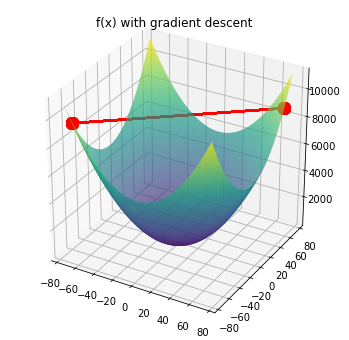

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

def f(x1,x2):
  return x1**2 + x2**2

x1=np.linspace(-75,75,400)
x2=np.linspace(-75,75,400)
X, Y = np.meshgrid(x1,x2)
Z=f(X,Y)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('f(x) with gradient descent')

ax.plot(X4,Y4,Z4, color='red', marker='o', linestyle='dashed',
     linewidth=2, markersize=12)
plt.show()

By using  $\alpha$  = 1 there was absolutely no convergence what so ever. The algorithm just gone back and forward between the 2 points. We can see that the  $\alpha$  is too big.
For  $\alpha$ = 2 the result will be even worst.

#### 1.2 A function with multiple minima
Let's now analyze the function $ f(x_1, x_2) = x_1^2(4-2.1x_1^2+\frac{1}{3}x_1^4) + x_1x_2+x_2^2(-4+4x_2^2) $

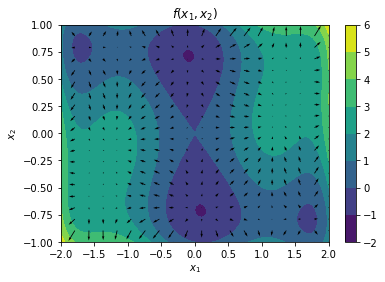

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Countour plot of f(x)
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = x1**2 * (4 - 2.1 * x1**2 + (1/3 * x1**4)) + x1 * x2 + x2**2 * (-1 * 4 + 4 * x2**2) 
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp) 
ax.set_title('$f(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

x,y = np.meshgrid(np.linspace(-2,2,20),np.linspace(-1,1,20))

u = 8*x-8.4*x**3+2*x**5+y
v = x-8*y+16*y**3

plt.quiver(x,y,u,v)
plt.show()


Looking at the contour plot, we can guess that the two most frequent minima that will be found are the ones in the center of the plot, although it will depend on where we start, if for example our $x^0$ will be close to the bottom-right corner or top-left one, the found minima will probably be a local one, and not the global ones. Now we will use the simple gradient descent with 100 iterations to illustrate different paths of the algorithm.

In [ ]:
def f(x1, x2):
    return x1**2 * (4 - 2.1 * x1**2 + (1/3 * x1**4)) + x1 * x2 + x2**2 * (-1 * 4 + 4 * x2**2) 

def gradf(fxy):
    return np.array([8*fxy[0]-8.4*fxy[0]**3+2*fxy[0]**5+fxy[1], fxy[0]-8*fxy[1]+16*fxy[1]**3])

x02 = np.random.uniform(-1, 1)
x01 = np.random.uniform(-2, 2)

def grad_descent(x1, x2, alpha, iter):
    pair = np.array([x1, x2])
    points = [[x1, x2]]
    for i in range(iter):
        pair = pair - alpha*gradf(pair) 
        points.append([pair[0], pair[1]])
    return points

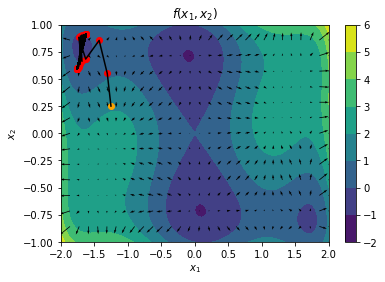

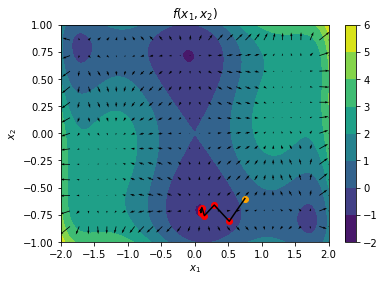

In [ ]:
# Countour plot of f(x)

#x02 = np.random.uniform(-1, 1)
#x01 = np.random.uniform(-2, 2)

def plot(x01, x02):
    x1 = np.linspace(-2, 2, 100)
    x2 = np.linspace(-1, 1, 100)
    x1, x2 = np.meshgrid(x1, x2)
    Z = x1**2 * (4 - 2.1 * x1**2 + (1/3 * x1**4)) + x1 * x2 + x2**2 * (-1 * 4 + 4 * x2**2) 
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(x1, x2, Z)
    fig.colorbar(cp) 
    ax.set_title('$f(x_1,x_2)$')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    x,y = np.meshgrid(np.linspace(-2,2,30),np.linspace(-1,1,15))

    u = 8*x-8.4*x**3+2*x**5+y
    v = x-8*y+16*y**3

    plt.quiver(x,y,u,v)
    points = grad_descent(x01, x02, 0.1, 100)
    lines_x = [points[x][0] for x in range(len(points))]
    lines_y = [points[x][1] for x in range(len(points))]
    plt.plot(lines_x, lines_y, 'black', linestyle="-")
    for i in range(len(points)):
        if i == 0:
            plt.scatter(points[i][0], points[i][1], color='orange')
            plt.plot()
        else:
            plt.scatter(points[i][0], points[i][1], color='r')
    plt.show()


plot(-1.25, 0.25)
plot(0.75, -0.6)


The previous plots represent two descents starting from two different points. We can see that the point of convergence will depend only on $x^0$, colored in orange.

Now we will try a different approach, slightly more compliacted than the previous one. The advantage of using backtracking algorithms is that we can adjust the step size while executing the gradient descent, the new algorithm will perform two checks for each iteration. 

(a) the first one will check if the convergence criteria is statisfied, if the proposed value of $\alpha^k$ reduces the value of the function evaluated at $x^k$, where k is the iteration number

(b) if the first point is not satisfied we have to update $ \alpha^k = \frac{\alpha^k}{2}$ and then we repeat the first check.

In [2]:
import numpy as np
def function(x):
  return x[0]**2 * (4 - 2.1 * x[0]**2 + (1/3 * x[0]**4)) + x[0] * x[1] + x[1]**2 * (-1 * 4 + 4 * x[1]**2) 

def gradf(fxy):
    return np.array([8*fxy[0]-8.4*fxy[0]**3+2*fxy[0]**5+fxy[1], fxy[0]-8*fxy[1]+16*fxy[1]**3])

def back_prop(x, points,alpha = 1):
    if function(x-alpha *gradf(x)) < function(x):
        points.append(x)
        x = x-alpha *gradf(x)
        if np.sqrt(gradf(x)[0]**2+gradf(x)[1]**2) < 0.00001:
            points.append(x)
            return [len(points)-1, points]
        else:
            res = back_prop(x, points, 1)
    else:
        alpha = alpha / 2
        res = back_prop(x, points,alpha)
    return res

itera, points = back_prop(np.array([-1.25, 0.25]), [])
print(f"{itera} iterations were needed to converge to {points[-1]}")
itera, points = back_prop(np.array([-0.75, -0.6]), [])
print(f"{itera} iterations were needed to converge to {points[-1]}")


18 iterations were needed to converge to [-1.70360677  0.79608338]
15 iterations were needed to converge to [ 0.08984192 -0.71265621]


We can see that by changing the value of alpha according to the needed size, we can obtain a good result in way less iterations, still having a good accuracy for the minimum. In fact the iterations needed for the same points we plot before, are 18 and 15, way less compared to 100. 

#### 1.3 The Rosenbrock function
Now we will analyze the Rosenbrock function, a function that doesn't have a trivial shape and not even a local minimum. We'll try to use the gradient descent with this function, even if we can guess tha it would perform poorly.

Below we defined some functions that will simplyfy the future calculations, both in general and also for the Rosenbrock function specifically.

In [34]:
import scipy


def gradStep(x, grad, stepSize):
    return x - stepSize*grad(x)


# in general
def descAlgs(x, step, direction):
    return x - step * direction

def NewtonStep(x, grad, Hessian, stepSize=1):
    try:
        d = np.linalg.inv(Hessian(x)) @ grad(x) # np.linalg.solve(Hessian(x), grad(x))
    except Exception:
        print(Exception)
        d = np.zeros(x.shape)
    return x - stepSize*d
    
    #return x - stepSize * np.linalg.inv(Hessian(x)) @ grad(x)

In [35]:
steps = 10000
stepSize = 0.01
x0 = np.array([100,50])

def f(x):
    return 100*x[0]**2+x[1]**2

def gradF(x):
    return np.array([200*x[0], 2*x[1]])

def HessianF(x):
    return np.array([[200, 0], [0, 2]])
x = x0
for i in range(steps):
    x = gradStep(x, gradF, stepSize)

stepSize = 0.1
x = x0
for i in range(steps):
    x = NewtonStep(x, gradF, HessianF, stepSize)



Let's first calculate the gradient and the Hessian of the Rosenbrock function.

$f(x) = (a-x_1)^2 + b(x_2-x_1^2)^2$


It has 2 params $a$ and $b$ which will be set to $a=1, b=100$ in the later analysis.
The Gradient is as follows by applying mainly the chain rule:

$\nabla f(x) = \begin{pmatrix}-2(a-x_1) - 4x_1b(x_2-x_1^2) \\ 2b(x_2 - x_1^2)\end{pmatrix}$

For the Hessian we get the following expression after some calculations according to chain and product rule (and of course some reordering of terms):


$\nabla^2 f(x) = \begin{pmatrix} 2 -(4b(x_2-3x_1^2)) && -4bx_1 \\
-4bx_1 && 2b \end{pmatrix}$

In [36]:
# initial definition of function and gradients

def Rosenbrock(x, a=1, b=100):
    return (a-x[0])**2+b*(x[1]-x[0]**2)**2

def RosenbrockFast(x, y, a=1, b=100):
    return Rosenbrock(np.array([x,y]), a, b)


def RosenbrockGrad(x, a=1, b=100, getDir=False):
    if getDir:
        startHeight = Rosenbrock(x)
        grad = np.array([
            -2*(a-x[0])- 4*x[0]*b*(x[1]-x[0]**2),
            2*b*(x[1]-x[0]**2)])
        endHeight = Rosenbrock(x + grad)
        return np.array([grad[0], grad[1], endHeight-startHeight])
    else:
        return np.array([
            -2*(a-x[0])- 4*x[0]*b*(x[1]-x[0]**2),
            2*b*(x[1]-x[0]**2)
            ])

def RosenbrockFastGrad(x, y, a=1, b=100, getDir=False):
    return RosenbrockGrad(np.array([x,y]), a, b, getDir)

def RosenbrockHessian(x, a=1, b=100):
    return np.matrix([
        [2 - 4*b*(x[1]-3*x[0]**2), -4*b*x[0]],
        [-4*b*x[0], 2*b]
    ])

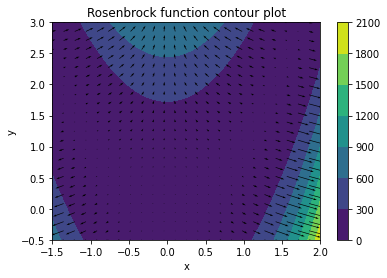

In [39]:
# Countour plot of f(x) for the Rosenbrock function
x = np.linspace(-1.5, 2, 1000)
y = np.linspace(-0.5, 3, 1000)
X, Y = np.meshgrid(x, y)
Z = RosenbrockFast(X,Y)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) 
ax.set_title('Rosenbrock function contour plot')


#gradient plot
x1 = np.linspace(-1.5, 2, 25)
x2 = np.linspace(-0.5, 3, 25)
XGrad, YGrad = np.meshgrid(x1,x2)
zStart = RosenbrockFast(XGrad,YGrad)
grads = RosenbrockFastGrad(XGrad,YGrad, 1, 100, True)


ax.quiver(XGrad, YGrad, grads[0,:,:], grads[1,:,:])
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

We can see. that the Rosenbrock function increases quickly towards the edges of the plot, while having a big deep valley with small values in the area of low values around the minimum.

Additionally, we can see, that the gradients(note the arrows are automatically scaled to fit in the picture) in the valley are all very low compared to the ones around it.

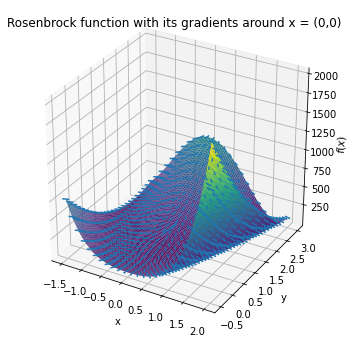

In [40]:
from turtle import color


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


x1 = np.linspace(-1.5, 2, 100)
x2 = np.linspace(-0.5, 3, 100)
X, Y = np.meshgrid(x1,x2)
Z = RosenbrockFast(X,Y)


ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Rosenbrock function with its gradients around x = (0,0)')
#add gradient information

# 3d gradients not really sweet on this one thats why we are normalizing
#norms = np.apply_along_axis(scipy.linalg.norm, 0, grads)
#grads *= 200/max(norms.flatten())
ax.quiver(XGrad, YGrad, zStart, grads[0,:,:], grads[1,:,:], grads[2,:,:], arrow_length_ratio=0.3, normalize = True)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("$f(x)$")
plt.show()


In the surface plot we can see the Valley structure and the gradients, note that all of them are normalized, because otherwise the different scales of x,y and the z axes would negate all interpertability from the plot.

In [37]:
from cProfile import label
import plotly.graph_objects as go
import plotly.express as px

In [42]:

#basic surface plot
x1 = np.linspace(-2, 2.5, 100)
x2 = np.linspace(-2, 3.5, 100)
X, Y = np.meshgrid(x1,x2)
Z = RosenbrockFast(X,Y)
fig = go.Figure(data =
    go.Contour(
        z=Z,
        x=x1,
        y=x2,
        colorbar=dict(
            title='f(x)', 
            titleside='right',
            titlefont=dict(
                size=14,
                family='Arial, sans-serif')
        )
    )
)
#variables of our thingy
numStartPoints = 30
numSteps = 150000 #the maximum number of allowed iterations
X,Y = np.meshgrid(np.linspace(-1.5, -2, numStartPoints), np.linspace(-0.5, -3,numStartPoints))
startPoints = [(np.random.uniform(-1.5, 2),np.random.uniform(-0.5, 3)) for x in range(numStartPoints)]
stepSizes = [0.0075, 0.005, 0.001, 0.0005, 0.0001]
colors = {
    0.0075: px.colors.sequential.Blues,
    0.005: px.colors.sequential.Magenta,
    0.001: px.colors.sequential.Oranges,
    0.0005: px.colors.sequential.ice,
    0.0001: px.colors.sequential.Reds
}

js = dict((stepSize, 0) for stepSize in stepSizes)
for stepSize in stepSizes:
    print(stepSize)
    for x0 in startPoints:
        print(stepSize)
        path = np.ones((numSteps+1, 2))
        path[0] = x0
        for i in range(numSteps):
            i = i+1
            path[i] = gradStep(path[i-1], RosenbrockGrad, stepSize)
            if np.linalg.norm(RosenbrockGrad(path[i])) < 0.001:
                break
        #first try for the thing?
        if Rosenbrock(path[i])<=100 and js[stepSize] < len(colors[stepSize]): #only plot if we converge adn we still have colors left
            #plotting with plotly
            trace = go.Scatter(x=path[:,0],
                               y=path[:,1],
                               mode="lines",
                               line=go.scatter.Line(color=colors[stepSize][js[stepSize]]),
                               showlegend=True,
                               name=f"Example path {js[stepSize]} for stepsize {stepSize}")
            fig.add_trace(trace)
            js[stepSize] += 1
        print(f"We got from {path[0]} to {path[i]} in {i} steps and decreased the value from {Rosenbrock(path[0])} to {Rosenbrock(path[i])} while using stepsize {stepSize}")


fig.update_layout(legend=dict(
    yanchor="top",
    y=-0.05,
    xanchor="left",
    x=0.01,
    orientation = "h"
    ),
                  yaxis=dict(
                      title="y"                
                      
                  ),
                  xaxis=dict(
                      title="x"                
                      
                  ))
fig.show()

0.0075


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

overflow encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning:

overflow encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning:

invalid value encountered in double_scalars



0.0075
0.0075
0.0075
0.0075
0.0075
0.0075
0.0075


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in subtract



0.0075
0.0075
0.0075
0.0075
0.0075
0.0075
0.0075
0.0075
0.0075
0.0075
0.0075
0.0075
0.0075
0.0075
0.0075
0.0075
0.0075
0.0075
0.0075
0.0075
0.0075
0.0075
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001


We can observe the following things:
For $stepsizes>0.0075$ we barely converge or even go to $\infty$, thats why we only look into lower stepsizes.

For the higher stepsizes ($0.0075, 0.005, 0.001$) the gradient descent algorithm first takes big steps towards the valley until jumps around a lot in the valley ($0.0075, 0.005$), until it goes further to the minimal point ($0.001$).

Around the minimum (most of the times already in the valley) the gradient descent algorithm only goes on to take small steps towards the minimum, bc the gradients already nearly vanishes and the stepsizes have to be choosen pretty small, otherwise we'd never reach the valley in the first place, even though we're already starting pretty close to it. The lower we choose the stepsize, the more distant is the endpoint after $150000$ iterations from the minimum. Only the stepsizes $0.001 $ and $0.0005$ seem to be able to early terminate and reach the stop condition (usually between $3000$ and $30000$ steps) in some starting points. $0.0001$ reaches the stop condition sometimes to, but only after about $120000$ iterations, because the convergence for that small stepsizes is way too slow.

Overall, we can notice that the gradient descent method performs very good with easier functions, by adapting the step size at each iteration we will easily arrive to a minimum if many are present (like it happened in 1.2), althought for more complicated functions like the Rosenbrock, many iterations will be needed, for sure the simple gradient descent is not optimal for finding the minimum. 

### 2. Newton descent method
Instead of considering the gradient direction for the descent, now we will check the performance of using the Newton descent method
#### 2.1 A simple quadratic function
The function that we are going to study now is $ f(X) = 100x_1^2 +x_2^2 $ for $ x \in \R^2, x = (x_1, x_2)^T $. We can notice that this function is convex since the coefficients of $ x_1^2, x_2^2 $ are positive, therefore we will only have one minimum.

Let's find this minimum by usint the algorithm implemented in 1.2




In [17]:

# function definition
def fxz(X,Y):
    Z = []
    for x in range(len(X)):
        Z.append([])
        for y in range(len(X[0])):
          Z[-1].append(function_2(X[x][y], Y[x][y]))
    return Z

def function_2(x1,x2):
  return 100*x1**2 + x2**2

# Grid for plotting in the search space
x1 = np.linspace(-5, 5,20)
x2 = np.linspace(-5, 5,20)
X1, X2 = np.meshgrid(x1, x2)
Z = fxz(X1,X2)

# plotting layout
fig = go.Figure(data=[go.Surface(x=X1, y=X2, z = Z)])

#fig = go.figure(data[go.])


fig.update_layout(title='f(x1,x2)', autosize=False,
                  width=700, height=700,
                  margin=dict(l=20, r=20, b=20, t=20))

fig.update_layout(scene = dict(
                    xaxis_title='x1',
                    yaxis_title='x2',
                    zaxis_title='z'),
                    width=500,
                    height=700,
                    margin=dict(r=40, b=40, l=40, t=40))

fig.show()


In [27]:
def function_2(x):
  return 100*x[0]**2 + x[1]**2

def gradf_2(fxy):
    return np.array([200*fxy[0], 2*fxy[1]])


def gradient_descent_21(x, points,alpha = 1):
    if function_2(x-alpha *gradf_2(x)) < function_2(x):
        points.append(x)
        x = x-alpha *gradf_2(x)
        if np.sqrt(gradf_2(x)[0]**2+gradf_2(x)[1]**2) < 0.00001:
            points.append(x)
            return [len(points)-1, points]
        else:
            res = gradient_descent_21(x, points, 1)
    else:
        alpha = alpha / 2
        res = gradient_descent_21(x, points,alpha)
    return res

import sys
sys.setrecursionlimit(1000000000)
print(gradient_descent_21(np.array([10,10]),[])[0])

667


The number of different points needed for the algorithm to converge is 667 starting from the point (10,10).

Now, by using the same starting point and the same backtracking algorithm, we will now use the newton method to descent down the gradient. We have set the threshold for the minimum at $10^{-5}$.

In [28]:
import numpy as np

def function_2(x):
  return 100*x[0]**2 + x[1]**2

def gradf_2(fxy):
    return np.array([200*fxy[0], 2*fxy[1]])

def newton_21(x, points, alpha = 1, c=[]):
    dxx = 200
    dyy = 1

    hessian = np.array([[dxx, 1],[1, dyy]])
    if function_2(x-alpha*np.matmul(np.linalg.inv(hessian),gradf_2(x))) < function_2(x):
        points.append(x)
        x = x-alpha*np.matmul(np.linalg.inv(hessian),gradf_2(x))
        c.append('g')
        if np.sqrt(gradf_2(x)[0]**2+gradf_2(x)[1]**2) < 0.00001:
            points.append(x)
            return [len(points)-1, points, c]
        else:
            res = newton_21(x, points, 1,c)
    else:
        alpha = alpha / 2
        res = newton_21(x, points,alpha, c)
    return res

itera, points_newton_21, c = newton_21(np.array([10,10]), [])
print(itera, points_newton_21)

7 [array([10, 10]), array([ 0.05025126, -0.05025126]), array([-0.00075756,  0.10126007]), array([ 0.00013197, -0.00088953]), array([-9.60312686e-06,  1.03109908e-03]), array([ 4.03967448e-07, -1.00070943e-05]), array([-1.02603799e-07,  1.05136656e-05]), array([ 1.78838906e-09, -1.04392188e-07])]


There are 7 different points needed by the algorithm to converge when starting from the point (10,10). This is an improvement of over 100 times. As we can see the newton descent algorithm converges much faster than the normal descent algorithm.

Now we will be plotting the path taken by the normal Gradient Descent Algorithm.

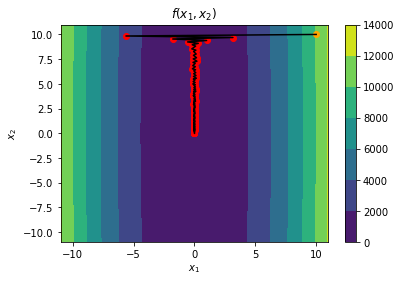

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib import collections  as mc

# Countour plot of the newton method
x1 = np.linspace(-11, 11, 100)
x2 = np.linspace(-11, 11, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = 100*x1**2 + x2**2
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp)
ax.set_title('$f(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')


itera, points_newton_21 = gradient_descent_21(np.array([10,10]), [])
lines_x = [points_newton_21[x][0] for x in range(len(points_newton_21))]
lines_y = [points_newton_21[x][1] for x in range(len(points_newton_21))]
plt.plot(lines_x, lines_y, 'black', linestyle="-")
for i in range(len(points_newton_21)):
    if i == 0:
        plt.scatter(points_newton_21[i][0], points_newton_21[i][1], color='orange')
        plt.plot()
    else:
        plt.scatter(points_newton_21[i][0], points_newton_21[i][1], color='r')
plt.show()

We can see that The algorithm makes the point jump around and then slowly converge to the minimum. At first the big jumps are because of the big alpha. As the alpha  gets smaller, the algorithm won't jump around but it will converge very slowly.

We will now be plotting the path that was taken by the Newton Method.

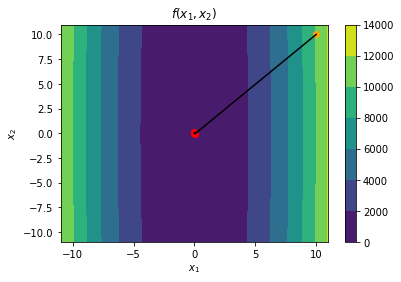

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib import collections  as mc

# Countour plot of the newton method
x1 = np.linspace(-11, 11, 100)
x2 = np.linspace(-11, 11, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = 100*x1**2 + x2**2
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp)
ax.set_title('$f(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')


itera, points_newton_21, c = newton_21(np.array([10,10]), [])
lines_x = [points_newton_21[x][0] for x in range(len(points_newton_21))]
lines_y = [points_newton_21[x][1] for x in range(len(points_newton_21))]
plt.plot(lines_x, lines_y, 'black', linestyle="-")
for i in range(len(points_newton_21)):
    if i == 0:
        plt.scatter(points_newton_21[i][0], points_newton_21[i][1], color='orange')
        plt.plot()
    else:
        plt.scatter(points_newton_21[i][0], points_newton_21[i][1], color='r')
plt.show()

This graph shows that the newton descent method uses the Taylor Exapnsion given Direction very well as it goes close to the minimum instantly. There are only a few more steps needed for our method to touch the minimum threshold. There's one risk associated with this method: In a function that has more local minimas it is possible for the newton descent to get close rapidly to a minimum point but then it could take a lot of iterations for it to get to the threshold.

#### 2.2 A function with multiple minima


Now let's go back to the function from exercise 1.2. Here we will check how many iterations are needded to find the minimum starting from (-1.5, -0.25).

Iterations:  10


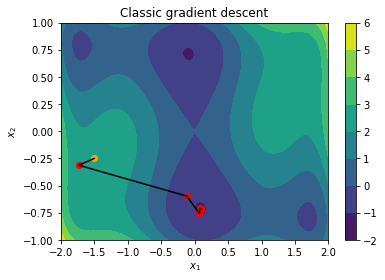

In [13]:
import matplotlib.pyplot as plt

itera, points = back_prop(np.array([-1.5,-0.25]), [])
print('Iterations: ',itera)
# Countour plot of fC(x)
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = x1**2 * (4 - 2.1 * x1**2 + (1/3 * x1**4)) + x1 * x2 + x2**2 * (-1 * 4 + 4 * x2**2) 
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp) 
ax.set_title('Classic gradient descent')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')


lines_x = [points[x][0] for x in range(len(points))]
lines_y = [points[x][1] for x in range(len(points))]
plt.plot(lines_x, lines_y, 'black', linestyle="-")
for i in range(len(points)):
    if i == 0:
        plt.scatter(points[i][0], points[i][1], color='orange')
        plt.plot()
    else:
        plt.scatter(points[i][0], points[i][1], color='r')
plt.show()




Now we will try to perform the gradient descent with the Newton method.

Hessian matrix for our function:
$ Hf(x_1,x_2) =  \begin{pmatrix} 
\frac{\partial^{2} f}{\partial x_{1}^{2}}(x^*) & \frac{\partial^{2} f}{\partial x_{2}x_{1}}(x^*) \\
\frac{\partial^{2} f}{\partial x_{1}x_{2}}(x^*)  & \frac{\partial^{2} f}{\partial x_{2}^{2}}(x^*)  
\end{pmatrix} = \begin{pmatrix} 8-25.2x_1^2+10x_1^4 & 1 \\
1 & -8+48x_2^2 \end{pmatrix}$

To perform the Newton method we have to ensure that the Hessian is positive definite, by checking that the eigen values are always positive.

Positive definite Hessian check:

$(8-25.2x_1^2+10x_1^4 - \lambda)(-8+48x_2^2- \lambda) -1 = 0 \\
\lambda = \frac{\frac{\partial^{2} f}{\partial x_{1}^{2}}+\frac{\partial^{2} f}{\partial x_{2}^{2}} \pm \sqrt{(\frac{\partial^{2} f}{\partial x_{1}^{2}}+\frac{\partial^{2} f}{\partial x_{2}^{2}})^2 -4\frac{\partial^{2} f}{\partial x_{1}^{2}} \frac{\partial^{2} f}{\partial x_{2}^{2}} +4}}{2} $

Gradient descent: $ x^{k+1}=x^k-\alpha^k \nabla f(x^k)$

Newton descent method: $x^{k+1}=x^k+\alpha^k d^k$, where $\nabla^2f(x^k)d^k = -\nabla f(x^k) \\ x^{k+1}=x^k-\alpha^k \nabla^2(x^k)^{-1} \nabla f(x^k) $

In the following cells is implemented an algorithm that uses the Newton method when possible, still updating the alpha value for each step.

In [7]:
def newton(x, points, alpha = 0.001, c=[]):
    dxx = 8-25.2*x[0]**2+10*x[0]**4
    dyy = -8+48*x[1]**2
    l1 = (dxx + dyy + np.sqrt((dxx+dyy)**2 - 4*dxx*dyy+4))/2
    l2 = (dxx + dyy - np.sqrt((dxx+dyy)**2 - 4*dxx*dyy+4))/2
    if l1 > 0 and l2 > 0:
        
        hessian = np.array([[dxx, 1],[1, dyy]])
        if function(x-alpha*np.matmul(np.linalg.inv(hessian),gradf(x))) < function(x):
            points.append(x)
            x = x-alpha*np.matmul(np.linalg.inv(hessian),gradf(x))
            c.append('g')
            if np.sqrt(gradf(x)[0]**2+gradf(x)[1]**2) < 0.0001:
                points.append(x)
                return [len(points)-1, points, c]
            else:
                res = newton(x, points, 1,c)
        else:
            alpha = alpha / 2
            res = newton(x, points,alpha, c)
    else:
        
        if function(x-alpha *gradf(x)) < function(x):
            points.append(x)
            x = x-alpha *gradf(x)
            c.append('r')
            if np.sqrt(gradf(x)[0]**2+gradf(x)[1]**2) < 0.0001:
                points.append(x)
                return [len(points)-1, points, c]
            else:
                res = newton(x, points, 1, c)
        else:
            alpha = alpha / 2
            res = newton(x, points,alpha,c)
    return res

itera, points, c = newton(np.array([-1.5,-0.25]), [])
#print(itera, points,c)
        

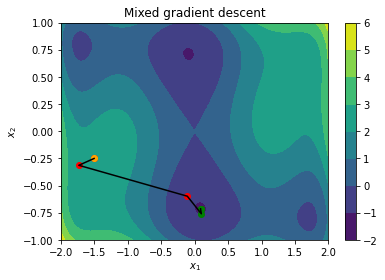

Iterations:  7


In [14]:
itera, points, c = newton(np.array([-1.5,-0.25]), [])

# Countour plot of f(x)
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = x1**2 * (4 - 2.1 * x1**2 + (1/3 * x1**4)) + x1 * x2 + x2**2 * (-1 * 4 + 4 * x2**2) 
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp) 
ax.set_title('Mixed gradient descent')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')


lines_x = [points[x][0] for x in range(len(points))]
lines_y = [points[x][1] for x in range(len(points))]
plt.plot(lines_x, lines_y, 'black', linestyle="-")
for i in range(1, len(points)):
    plt.scatter(points[i][0], points[i][1], color=c[i-1])
plt.scatter(points[0][0], points[0][1], color='orange')
plt.show()
print('Iterations: ',itera)

In the picture above we can observe the points in red being the ones computed with the classical gradiant descent, while the ones in green are the ones computed with the Newton method. It's interesting that the Newton method is used only in a convex environment, as we can see from the picture. 

Furthermore, the Newton method has a better performance than the classic gd, with mixed-gd we only have 7 iterations, while we had 10 for the previous one. Also, by observing the paths of the descents, we can see that as soon as our points start useing the Newton method, the path is way more straight forward and precise.

#### 2.3 The Rosenbrok function

In 1.3 we made some considerations on the number of iterations used by the classic gradient descent. Let's now start with the Newton experiments.

In [ ]:
#basic surface plot
x1 = np.linspace(-3, 2.5, 150)
x2 = np.linspace(-3, 3.5, 150)
X, Y = np.meshgrid(x1,x2)
Z = RosenbrockFast(X,Y)
figNewton = go.Figure(data =
    go.Contour(
        z=Z,
        x=x1,
        y=x2,
        colorbar=dict(
            title='f(x)', # title here
            titleside='right',
            titlefont=dict(
                size=14,
                family='Arial, sans-serif')
        )
    )
)

#created via colorRampPalette(brewer.pal(8,"Set2"))(30) %>% paste(collapse="', '") in R
colorsNewton = ['#66C2A5', '#8AB594', '#AEA884', '#D29B74', '#F68E64', '#E59077', '#CA9591', '#AF9AAA', '#949EC3', '#9C9CC9', '#B296C7', '#C791C5', '#DD8CC3', '#DE94B3', '#CEA798', '#BEBA7E', '#AECD63', '#AFD850', '#C4D847', '#DAD83E', '#EFD835', '#FDD735', '#F6D24E', '#F0CD66', '#EAC87F', '#E3C395', '#D7BF9C', '#CBBBA4', '#BFB7AB', '#B3B3B3']


for j, x0 in enumerate(startPoints):
    path = np.ones((150001, 2))
    path[0] = x0
    for i in range(150000):
        i = i+1
        path[i] = NewtonStep(path[i-1], RosenbrockGrad, RosenbrockHessian)
        if np.linalg.norm(RosenbrockGrad(path[i])) < 0.001 or np.linalg.norm(path[i]-path[i-1])==0:
            break
    #plotting
    trace = go.Scatter(x=path[:,0],
                       y=path[:,1],
                       mode="lines",
                       line=go.scatter.Line(color=colorsNewton[j]),
                       showlegend=True,
                       name=f"Example path {j} for stepsize Newton's method")
    figNewton.add_trace(trace)
    print(f"We got from {path[0]} to {path[i]} in {i} steps and decreased the value from {Rosenbrock(path[0])} to {Rosenbrock(path[i])} while using Newton's method")
    
    
figNewton.update_layout(legend=dict(
    yanchor="top",
    y=-0.05,
    xanchor="left",
    x=0.01,
    orientation = "h"
    ),
                  yaxis=dict(
                      title="y"                
                      
                  ),
                  xaxis=dict(
                      title="x"                
                      
                  ))
figNewton.show()

We got from [ 1.46969172 -0.1042029 ] to [1.00009814 1.00019628] in 3 steps and decreased the value from 512.8792591097736 to 9.630907566220596e-09 while using Newton's method
We got from [1.41346065 2.8946062 ] to [1.00043386 1.00086792] in 3 steps and decreased the value from 80.58435248595453 to 1.882376705604873e-07 while using Newton's method
We got from [-0.41381859  2.31201172] to [1. 1.] in 5 steps and decreased the value from 460.2867441361823 to 4.954490219047141e-27 while using Newton's method
We got from [-1.46553175  0.1028906 ] to [1. 1.] in 5 steps and decreased the value from 424.23746740886963 to 2.0540003137250254e-21 while using Newton's method
We got from [ 1.39695944 -0.16023165] to [1.00006747 1.00013495] in 3 steps and decreased the value from 446.0968136592343 to 4.552831954478268e-09 while using Newton's method
We got from [-1.33348683  2.34984083] to [0.99999878 0.99999756] in 5 steps and decreased the value from 38.123955902413236 to 1.487329125790987e-12 whi

The Newton Method specialises the descent direction by taking the bending of the curve (Hessian) into account while looking for the best direction, at the same time there is no need for stepsizes (in 2.1 the formula takes stepsizes into account, but the hessian already gives a good indicator for the length of the step which can be seen by taking different stepsizes as in 1.3 (just switch out gradSteo for NewtonStep there)). By this we now only need 3 to 5 steps to reach the minimum from a proper neighbourghhood of the minimum.

We can observe, that the method takes (if feasible) long steps towards the minimum and only short steps elsewise.

Now as a last try we want to see how the previous 2 methods work combined: i.e. we are only using newtons method while The Hessian is positive definite, i. e. eigenvalues > 0.

In [ ]:
import numpy as np
stepSize = 0.00001

#basic surface plot
x1 = np.linspace(-3, 2.5, 150)
x2 = np.linspace(-3, 3.5, 150)
X, Y = np.meshgrid(x1,x2)
Z = RosenbrockFast(X,Y)
figMixedNewton = go.Figure(data =
    go.Contour(
        z=Z,
        x=x1,
        y=x2,
        colorbar=dict(
            title='f(x)', # title here
            titleside='right',
            titlefont=dict(
                size=14,
                family='Arial, sans-serif')
        )
    )
)

#created via colorRampPalette(brewer.pal(8,"Set2"))(30) %>% paste(collapse="', '") in R
colorsMixedNewton = ['#66C2A5', '#8AB594', '#AEA884', '#D29B74', '#F68E64', '#E59077', '#CA9591', '#AF9AAA', '#949EC3', '#9C9CC9', '#B296C7', '#C791C5', '#DD8CC3', '#DE94B3', '#CEA798', '#BEBA7E', '#AECD63', '#AFD850', '#C4D847', '#DAD83E', '#EFD835', '#FDD735', '#F6D24E', '#F0CD66', '#EAC87F', '#E3C395', '#D7BF9C', '#CBBBA4', '#BFB7AB', '#B3B3B3']


for j, x0 in enumerate(startPoints):
    path = np.ones((150001, 2))
    path[0] = x0
    for i in range(150000):
        i = i+1
        
        w, v = np.linalg.eig(RosenbrockHessian(path[i-1]))      
        if all((ev > 0) for ev in w):
            path[i] = NewtonStep(path[i-1], RosenbrockGrad, RosenbrockHessian)
        else:
            print(f"Took gradient step at startpoint {j} for iteration {i} with eigenvalues {w}")
            path[i] = gradStep(path[i-1], RosenbrockGrad, stepSize)
        if np.linalg.norm(RosenbrockGrad(path[i])) < 0.001 or np.linalg.norm(path[i]-path[i-1])==0:
            break
    #plotting
    trace = go.Scatter(x=path[:,0],
                       y=path[:,1],
                       mode="lines",
                       line=go.scatter.Line(color=colorsMixedNewton[j]),
                       showlegend=True,
                       name=f"Example path {j} for stepsize Newton's method")
    figMixedNewton.add_trace(trace)
    print(f"We got from {path[0]} to {path[i]} in {i} steps and decreased the value from {Rosenbrock(path[0])} to {Rosenbrock(path[i])} while using teh mixed method")
    
    
figMixedNewton.update_layout(legend=dict(
    yanchor="top",
    y=-0.05,
    xanchor="left",
    x=0.01,
    orientation = "h"
    ),
                  yaxis=dict(
                      title="y"                
                      
                  ),
                  xaxis=dict(
                      title="x"                
                      
                  ))
figMixedNewton.show()

As we can see, adding the mixed algorithm only increases the number of steps fot these startpoints and the Rosenbrock function. If we lower the steosize we will even take more and more steps according to the gradient method and the results get worse.

As a Summary for the Rosenbrock function:

We took the same $30$ starting points for each algorithm. 
The gradient descent Only converges with adepted stepSizes and even then only slowly ($15000-40000$ iterations until the break condition is satisfied). For even smaller stepsizes there is a convergence Observable but we do not reach the break condition even after $150000$ iterations.

The Newton Method converges in every starting points after less than $10$ steps, most of the time we even only need 5 steps or less.

For the mixed Method we need some gradient steps for some of the starting points but still the same amount of Newton steps most of the time, i.e. We perform the Gradient steps on top of the Newton steps. Apparently for this function the Hessian is still a good correction for the gradient even when its not positive definite.